# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [100]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),animal_number,furniture_number
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03,0.222222,0.756266
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04,0.415759,0.429354
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02,0.000000,0.000000
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03,0.000000,1.000000
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03,0.000000,1.000000
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03,0.000000,1.000000
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06,1.000000,1.000000


In [4]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [6]:
df.rename(columns= {'rent amount (R$)': 'valor_aluguel'}, inplace=True)

In [7]:
df['valor_aluguel'].mean()

3896.247194163861

In [8]:
df['valor_aluguel'].median()

2661.0

In [9]:
df['valor_aluguel'].std()

3408.5455176710675

In [10]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

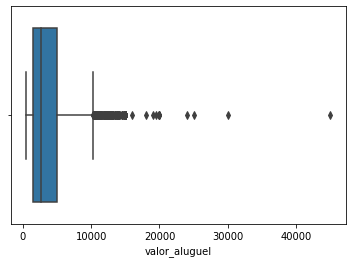

In [11]:
# Analisando Outliers dos valores de alguel.
ax = sns.boxplot(df['valor_aluguel'])

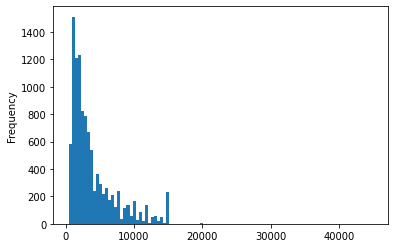

In [12]:
# Historigrama
df['valor_aluguel'].plot(kind = 'hist', bins=100);

In [13]:
#skewness positive skew
df['valor_aluguel'].skew()

1.8388773035440982

In [14]:
#kurtose - leptocurtica
df['valor_aluguel'].kurtosis()

4.624228179818687

## Exploracao multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais alta? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [15]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [16]:
#Qual a cidade com a média de aluguel mais alta? Mediana

df.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [17]:
#Qual a cidade com a média de aluguel mais alta? Média

df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [18]:
df.valor_aluguel.describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [19]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [20]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
Baixo         acept        6232
              not acept    1921
Name: animal, dtype: int64


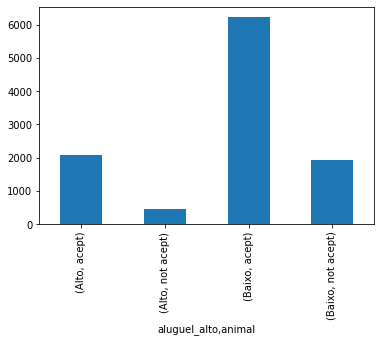

In [21]:
print(df.groupby('aluguel_alto')['animal'].value_counts())
df.groupby('aluguel_alto')['animal'].value_counts().plot.bar();

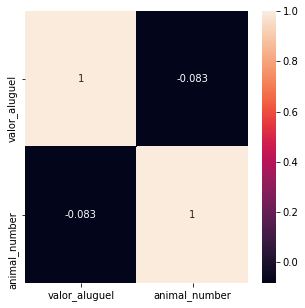

In [55]:
df['animal_number'] = labelencoder_df.fit_transform(df['animal'])
plt.figure(figsize=(5,5))
matriz_correlacao=df[['valor_aluguel','animal_number']].corr(method='spearman')
sns.heatmap(matriz_correlacao, annot=True)
plt.show()


aluguel_alto  furniture    
Alto          not furnished    1661
              furnished         878
Baixo         not furnished    6425
              furnished        1728
Name: furniture, dtype: int64


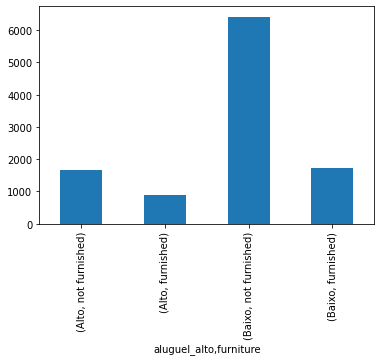

In [25]:
print(df.groupby('aluguel_alto')['furniture'].value_counts())
df.groupby('aluguel_alto')['furniture'].value_counts().plot.bar();

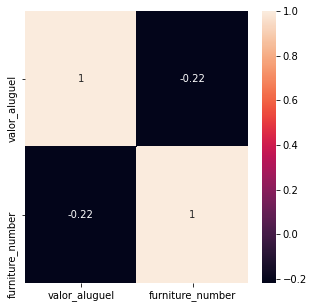

In [51]:
df['furniture_number'] = labelencoder_df.fit_transform(df['furniture'])
plt.figure(figsize=(5,5))
matriz_correlacao=df[['valor_aluguel','furniture_number']].corr(method='spearman')
sns.heatmap(matriz_correlacao, annot=True)
plt.show()


In [37]:
df.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$),aluguel_alto,animal_number,furniture_number
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,Baixo,0,0
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,Baixo,0,1
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,Baixo,0,1
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,Baixo,0,1
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,Baixo,1,1
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955,Alto,0,1
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750,Baixo,0,1
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253,Baixo,0,1
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440,Alto,0,0
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955,Baixo,0,0


### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [26]:
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [31]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})


In [28]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [35]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))
    print('*******************************************************')

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
*******************************************************
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
*******************************************************
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
*******************************************************
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
*******************************************************
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
*******************************************************
valor_aluguel
               valor_aluguel  valor_aluguel
valor_alugue

## Visualização de dados

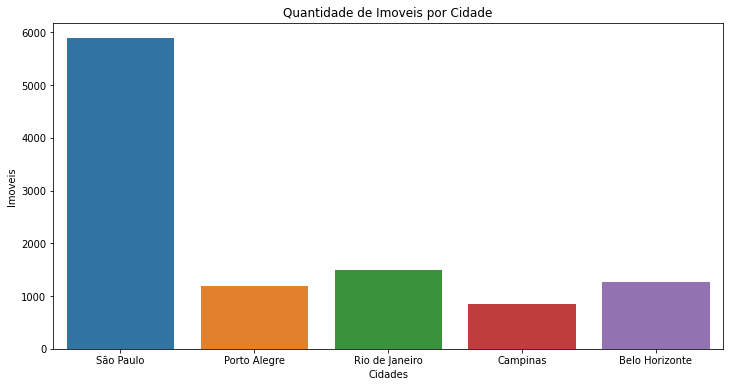

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='city', data=df)
plt.title('Quantidade de Imoveis por Cidade')
plt.xlabel('Cidades')
plt.ylabel('Imoveis')
plt.show()

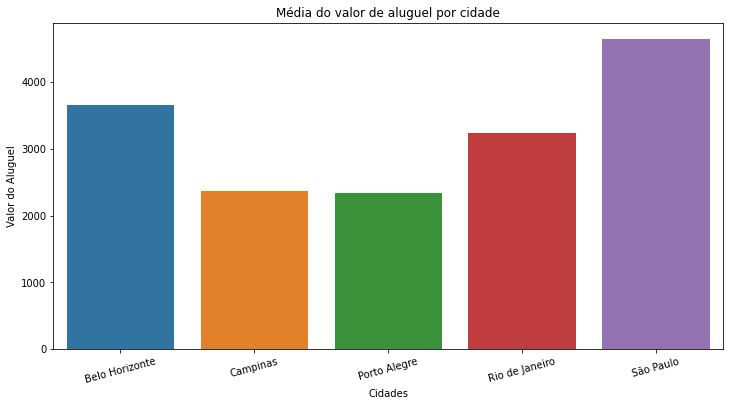

In [77]:
plt.figure(figsize=(12,6))
sns.barplot(x='city', y='valor_aluguel',data=df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title('Média do valor de aluguel por cidade')
plt.xlabel('Cidades')
plt.ylabel('Valor do Aluguel')
plt.xticks(rotation=15)
plt.show()

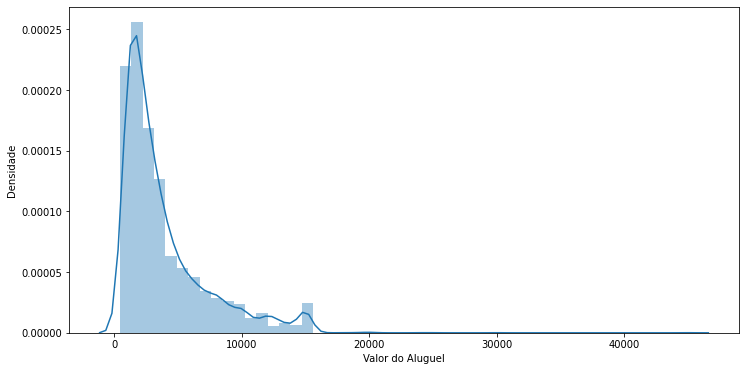

In [88]:
plt.figure(figsize=(12,6))
sns.distplot(df['valor_aluguel'])
plt.xlabel('Valor do Aluguel')
plt.ylabel('Densidade')
plt.show()

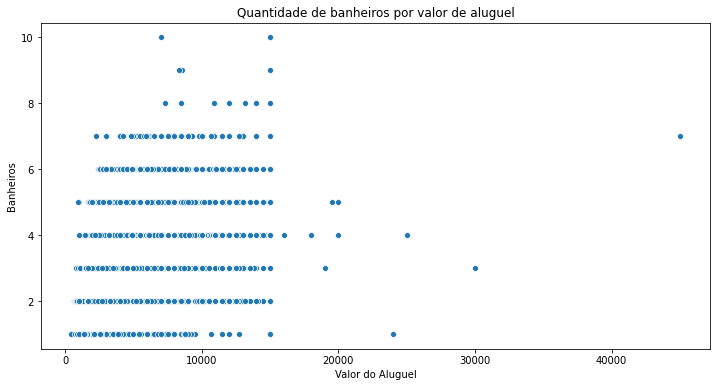

In [91]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='valor_aluguel', y='bathroom', data=df)
plt.title('Quantidade de banheiros por valor de aluguel')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Banheiros')
plt.show()

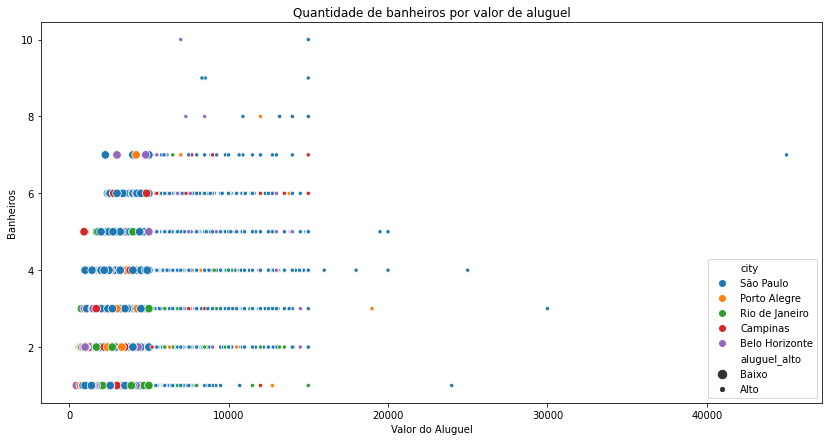

In [99]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='valor_aluguel', y='bathroom',hue='city',size='aluguel_alto', data=df)
plt.title('Quantidade de banheiros por valor de aluguel')
plt.xlabel('Valor do Aluguel')
plt.ylabel('Banheiros')
plt.show()

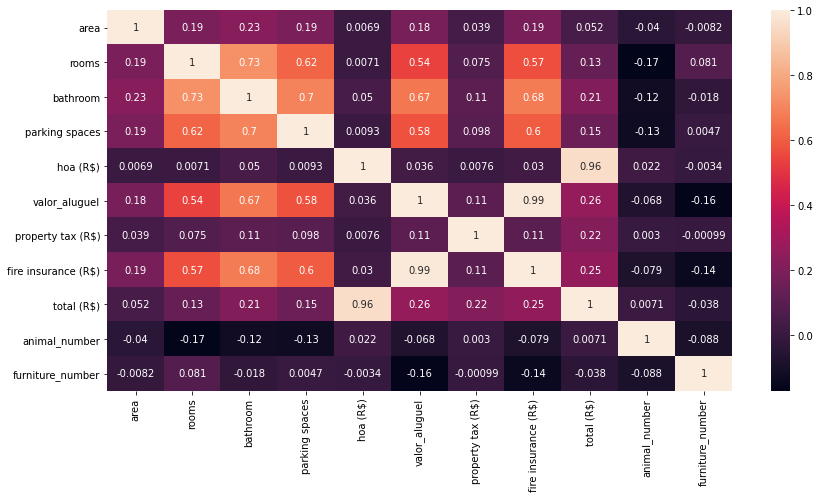

In [104]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

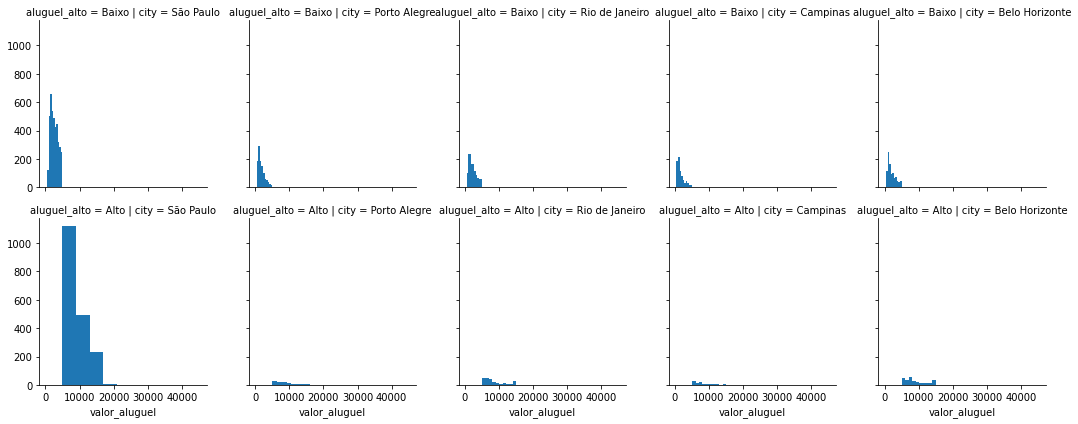

In [110]:
graph = sns.FacetGrid(df, col='city', row='aluguel_alto')
graph = graph.map(plt.hist, 'valor_aluguel')